<a href="https://colab.research.google.com/github/robolug/Artificial-Intelligence-for-Robotics/blob/master/Mass_Spring_Damper_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

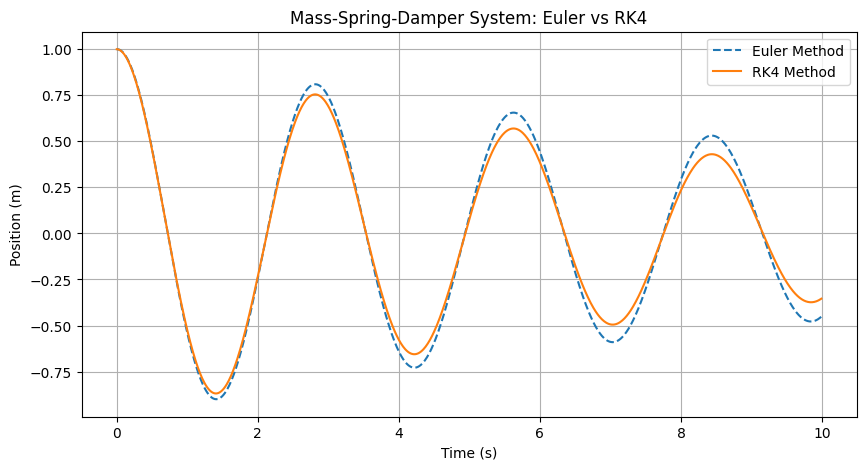

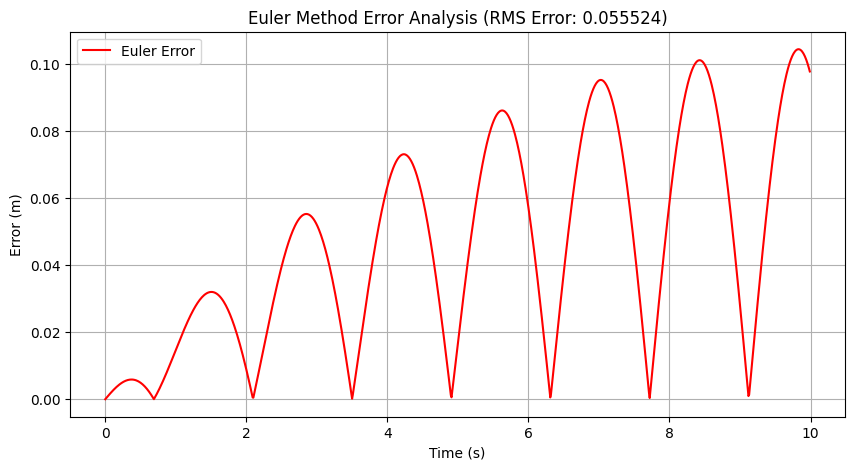

RMS Error: 0.055524


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mass_spring_damper_euler(m, c, k, x0, v0, dt, t_max):
    t = np.arange(0, t_max, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0

    for i in range(1, len(t)):
        a = (-c * v[i-1] - k * x[i-1]) / m
        v[i] = v[i-1] + a * dt
        x[i] = x[i-1] + v[i-1] * dt

    return t, x

def mass_spring_damper_rk4(m, c, k, x0, v0, dt, t_max):
    def acceleration(x, v):
        return (-c * v - k * x) / m

    t = np.arange(0, t_max, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0

    for i in range(1, len(t)):
        k1x = v[i-1] * dt
        k1v = acceleration(x[i-1], v[i-1]) * dt

        k2x = (v[i-1] + k1v / 2) * dt
        k2v = acceleration(x[i-1] + k1x / 2, v[i-1] + k1v / 2) * dt

        k3x = (v[i-1] + k2v / 2) * dt
        k3v = acceleration(x[i-1] + k2x / 2, v[i-1] + k2v / 2) * dt

        k4x = (v[i-1] + k3v) * dt
        k4v = acceleration(x[i-1] + k3x, v[i-1] + k3v) * dt

        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x) / 6
        v[i] = v[i-1] + (k1v + 2*k2v + 2*k3v + k4v) / 6

    return t, x

# Parameters
m, c, k = 1.0, 0.2, 5.0  # Mass, damping, spring constant
x0, v0 = 1.0, 0.0  # Initial position and velocity
dt, t_max = 0.01, 10  # Time step and maximum duration

# Solutions
t_euler, x_euler = mass_spring_damper_euler(m, c, k, x0, v0, dt, t_max)
t_rk4, x_rk4 = mass_spring_damper_rk4(m, c, k, x0, v0, dt, t_max)

# Error Analysis
euler_error = np.abs(x_rk4 - x_euler)
rms_error = np.sqrt(np.mean(euler_error**2))

# Compare Results
plt.figure(figsize=(10,5))
plt.plot(t_euler, x_euler, label='Euler Method', linestyle='dashed')
plt.plot(t_rk4, x_rk4, label='RK4 Method', linestyle='solid')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Mass-Spring-Damper System: Euler vs RK4')
plt.legend()
plt.grid()
plt.show()

# Error Plot
plt.figure(figsize=(10,5))
plt.plot(t_euler, euler_error, label='Euler Error', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.title(f'Euler Method Error Analysis (RMS Error: {rms_error:.6f})')
plt.legend()
plt.grid()
plt.show()

# Print RMS Error Value
print(f'RMS Error: {rms_error:.6f}')
